In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
data_dir = '/content/drive/MyDrive/Project1'

In [ ]:
os.listdir(data_dir)

['DR1', '.ipynb_checkpoints', 'DME1']

In [ ]:
image_exts = ['.jpeg','.tif','.bmp','.png']

array([[[ 84,  84,  84],
        [ 78,  78,  78],
        [ 85,  85,  85],
        ...,
        [ 92,  92,  92],
        [ 87,  87,  87],
        [ 88,  88,  88]],

       [[ 83,  83,  83],
        [ 85,  85,  85],
        [ 86,  86,  86],
        ...,
        [ 86,  86,  86],
        [ 82,  82,  82],
        [ 73,  73,  73]],

       [[ 89,  89,  89],
        [ 84,  84,  84],
        [ 83,  83,  83],
        ...,
        [ 87,  87,  87],
        [ 87,  87,  87],
        [ 90,  90,  90]],

       ...,

       [[115, 115, 115],
        [112, 112, 112],
        [116, 116, 116],
        ...,
        [ 71,  71,  71],
        [ 71,  71,  71],
        [ 70,  70,  70]],

       [[ 95,  95,  95],
        [105, 105, 105],
        [104, 104, 104],
        ...,
        [ 71,  71,  71],
        [ 70,  70,  70],
        [ 68,  68,  68]],

       [[122, 122, 122],
        [105, 105, 105],
        [106, 106, 106],
        ...,
        [ 69,  69,  69],
        [ 69,  69,  69],
        [ 66,  66,  66]]], dtype=uint8)
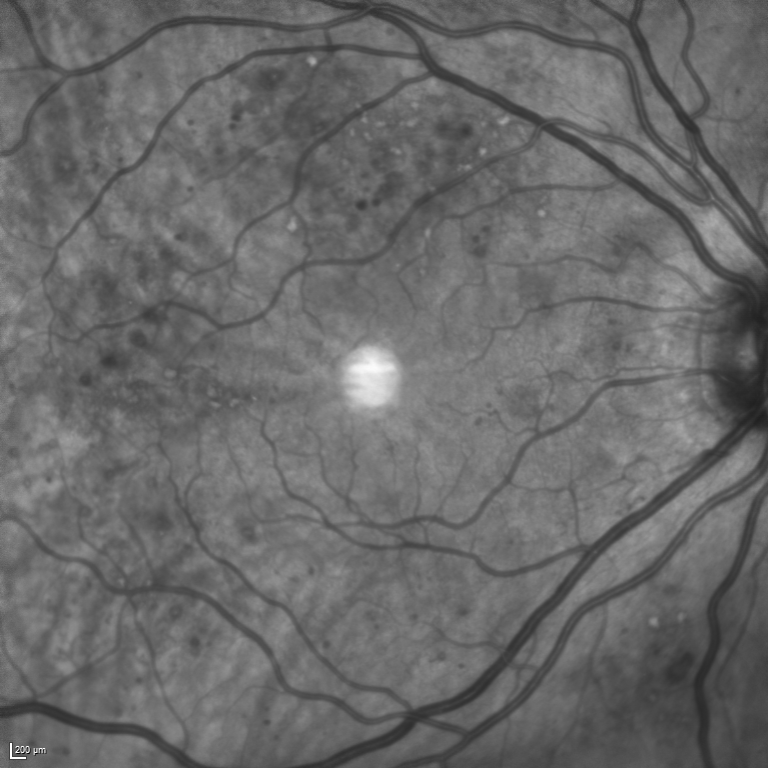

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Project1/DR1/fundus_OD_W0 (1)..png')
img

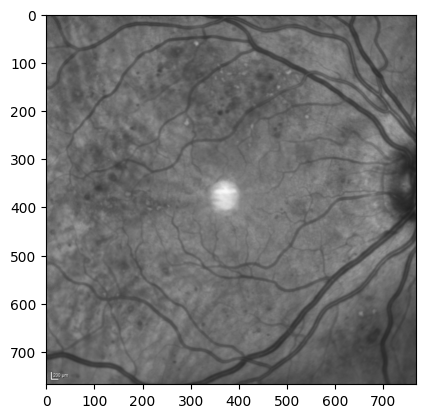

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Project1')

Found 67 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[1]

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int32)

In [ ]:
batch[0].shape

(32, 256, 256, 3)

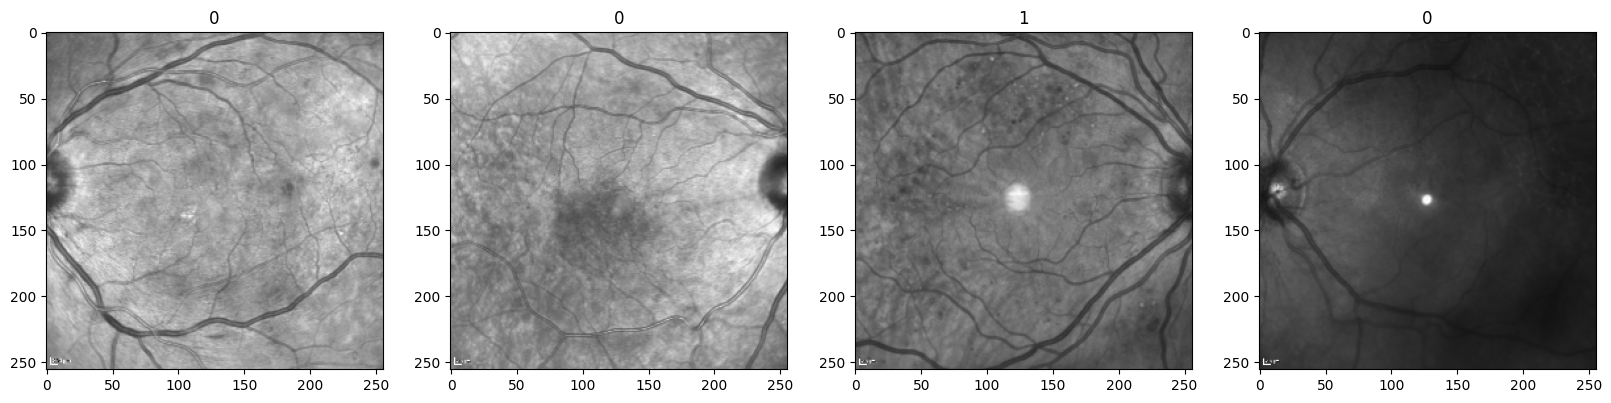

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255,y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].max()

1.0

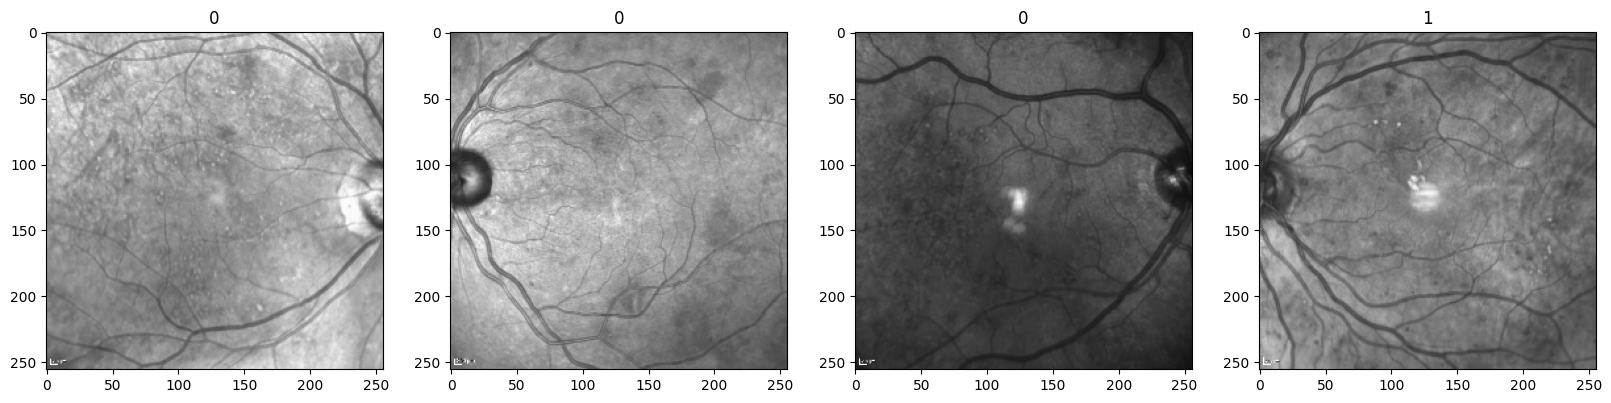

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
len(data)

3

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)* .2)+1
test_size = int(len(data)*.1)

In [ ]:
print(train_size, val_size, test_size)

2 1 0


In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(test)

0

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Flatten, Dropout,MaxPooling2D,Conv2D, BatchNormalization
from tensorflow.keras.models import Sequential

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(256,256,3)))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 384)       1

In [ ]:
logdir= '/content/drive/MyDrive/logs3'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
2/2 [==============================] - 20s 10s/step - loss: 2.3753 - accuracy: 0.4062 - val_loss: 0.8895 - val_accuracy: 0.3333
Epoch 2/20
2/2 [==============================] - 15s 7s/step - loss: 0.7730 - accuracy: 0.4219 - val_loss: 0.6909 - val_accuracy: 0.3333
Epoch 3/20
2/2 [==============================] - 17s 9s/step - loss: 0.7191 - accuracy: 0.4219 - val_loss: 0.6654 - val_accuracy: 0.3333
Epoch 4/20
2/2 [==============================] - 15s 8s/step - loss: 0.6834 - accuracy: 0.3750 - val_loss: 0.7789 - val_accuracy: 0.6667
Epoch 5/20
2/2 [==============================] - 15s 9s/step - loss: 0.6827 - accuracy: 0.4219 - val_loss: 0.6751 - val_accuracy: 0.3333
Epoch 6/20
2/2 [==============================] - 16s 8s/step - loss: 0.6821 - accuracy: 0.4062 - val_loss: 0.7303 - val_accuracy: 0.6667
Epoch 7/20
2/2 [==============================] - 15s 8s/step - loss: 0.6742 - accuracy: 0.4062 - val_loss: 0.7955 - val_accuracy: 0.6667
Epoch 8/20
2/2 [=================

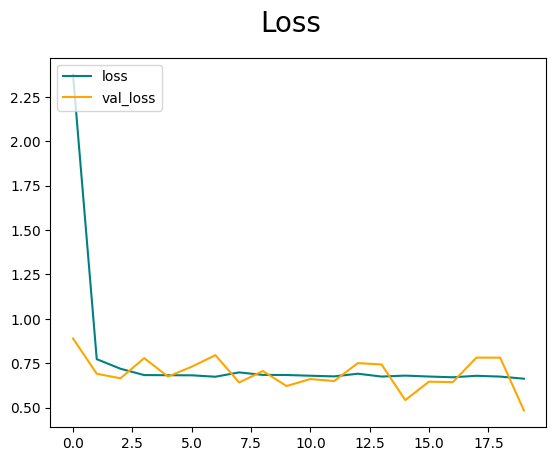

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

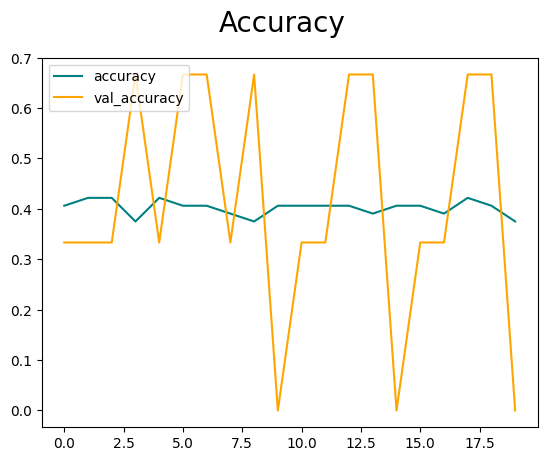

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy